In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import tensorflow as tf
import numpy as np
import starting_kit as sk
import shutil
import random

SEED = 1234
tf.random.set_seed(SEED)  

# Get current working directory
cwd = os.path.join(os.path.dirname(os.getcwd()),"Development_Dataset")

dataset_dir = os.path.join(cwd,'Training/Bipbip/Mais')

validation_dir = os.path.join(dataset_dir,'validation/')
training_dir = os.path.join(dataset_dir,'training/')


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

apply_data_augmentation = True

# Create training ImageDataGenerator object
if apply_data_augmentation:
    train_img_data_gen = ImageDataGenerator(rotation_range=30,
                                        width_shift_range=10,
                                        height_shift_range=10,
                                        zoom_range=0.3,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode='reflect',
                                        rescale=1./255)
    train_mask_data_gen = ImageDataGenerator(rotation_range=30,
                                        width_shift_range=10,
                                        height_shift_range=10,
                                        zoom_range=0.3,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode='reflect',
                                        )
else:
    train_img_data_gen = ImageDataGenerator(rescale=1./255)
    train_mask_data_gen = ImageDataGenerator()


# Create validation and test ImageDataGenerator objects
valid_img_data_gen = ImageDataGenerator(rescale=1./255)
valid_mask_data_gen = ImageDataGenerator()
test_img_data_gen = ImageDataGenerator(rescale=1./255)
test_mask_data_gen = ImageDataGenerator()

In [4]:
if not os.path.exists(os.path.join(dataset_dir,"training/")):
    os.makedirs(os.path.join(dataset_dir,"training/"))
    
if not os.path.exists(os.path.join(dataset_dir,"validation/")):
    os.makedirs(os.path.join(dataset_dir,"validation/"))

if os.path.exists(os.path.join(dataset_dir,"Images/")):
    shutil.move(os.path.join(dataset_dir,"Images/"),os.path.join(dataset_dir,"training/"))
    
if os.path.exists(os.path.join(dataset_dir,"Masks/")):
    shutil.move(os.path.join(dataset_dir,"Masks/"),os.path.join(dataset_dir,"training/"))
    

if not os.path.exists(os.path.join(training_dir,"Images/img")):
    os.makedirs(os.path.join(training_dir,"Images/img"))

if not os.path.exists(os.path.join(training_dir,"Masks/img")):
    os.makedirs(os.path.join(training_dir,"Masks/img"))

if not os.path.exists(os.path.join(validation_dir,"Images/img")):
    os.makedirs(os.path.join(validation_dir,"Images/img"))

if not os.path.exists(os.path.join(validation_dir,"Masks/img")):
    os.makedirs(os.path.join(validation_dir,"Masks/img"))

curr_dir = os.path.join(training_dir, "Images/")
image_filenames = next(os.walk(curr_dir))[2]
for image_name in image_filenames:
    os.rename(os.path.join(curr_dir,image_name), os.path.join(curr_dir,"img/")+image_name)

curr_dir = os.path.join(training_dir, "Masks/")
image_filenames = next(os.walk(curr_dir))[2]
for image_name in image_filenames:
    os.rename(os.path.join(curr_dir,image_name), os.path.join(curr_dir,"img/")+image_name)

if os.path.exists(os.path.join(validation_dir,"Images/img/")):
    curr_dir = os.path.join(validation_dir, "Images/img/")
    image_filenames = next(os.walk(curr_dir))[2]
    for image_name in image_filenames:
        os.rename(os.path.join(curr_dir,image_name), os.path.join(training_dir,"Images/img/")+image_name)

    
if os.path.exists(os.path.join(validation_dir,"Masks/img/")):
    curr_dir = os.path.join(validation_dir, "Masks/img/")
    image_filenames = next(os.walk(curr_dir))[2]
    for image_name in image_filenames:
        os.rename(os.path.join(curr_dir,image_name), os.path.join(training_dir,"Masks/img/")+image_name)    

In [5]:
random.seed(SEED)

if not os.path.exists(os.path.join(validation_dir,"Images/")):
    os.makedirs(os.path.join(validation_dir,"Images/"))
    
if not os.path.exists(os.path.join(validation_dir,"Masks/")):
    os.makedirs(os.path.join(validation_dir,"Masks/"))


curr_dir = os.path.join(training_dir, "Images/img/")

image_filenames = next(os.walk(curr_dir))[2]

for image_name in image_filenames:
    if 100*random.random() < 5:
        os.rename(os.path.join(curr_dir,image_name), os.path.join(validation_dir,"Images/img/")+image_name)


curr_dir = os.path.join(validation_dir, "Images/img/")
curr_dir_mask = os.path.join(training_dir, "Masks/img/")


mask_filenames = next(os.walk(curr_dir))[2]

for image_name in mask_filenames:
    os.rename(os.path.join(curr_dir_mask,image_name[:-3]+"png"), os.path.join(validation_dir,"Masks/img/")+image_name[:-3]+"png")


In [6]:

bs = 16

img_h = 256
img_w = 256

num_classes = 3


train_img_gen = train_img_data_gen.flow_from_directory(os.path.join(training_dir,'Images'),
                                                      target_size=(img_h,img_w),
                                                      batch_size=bs,
                                                      class_mode=None,#no class subfolder
                                                      shuffle=True,
                                                      interpolation='bilinear',
                                                      seed=SEED)
train_mask_gen = train_mask_data_gen.flow_from_directory(os.path.join(training_dir,'Masks'),
                                                      target_size=(img_h,img_w),
                                                      batch_size=bs,
                                                      class_mode=None,#no class subfolder
                                                      shuffle=True,
                                                      interpolation='bilinear',
                                                      seed=SEED) #same SEED for same transformation


train_gen=zip(train_img_gen,train_mask_gen)


valid_img_gen = valid_img_data_gen.flow_from_directory(os.path.join(validation_dir,'Images'),
                                                      target_size=(img_h,img_w),
                                                      batch_size=bs,
                                                      class_mode=None,#no class subfolder
                                                      shuffle=True,
                                                      interpolation='bilinear',
                                                      seed=SEED)
valid_mask_gen = valid_mask_data_gen.flow_from_directory(os.path.join(validation_dir,'Masks'),
                                                      target_size=(img_h,img_w),
                                                      batch_size=bs,
                                                      class_mode=None,#no class subfolder
                                                      shuffle=True,
                                                      interpolation='bilinear',
                                                      seed=SEED) #same SEED for same transformation


valid_gen=zip(valid_img_gen,valid_mask_gen)


Found 83 images belonging to 1 classes.
Found 83 images belonging to 1 classes.
Found 7 images belonging to 1 classes.
Found 7 images belonging to 1 classes.


In [7]:
# Training
train_dataset = tf.data.Dataset.from_generator(lambda: train_gen,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([None, img_h, img_w, 3], [None, img_h, img_w,3]))

#mask: 256*256*3 -> [0,0,0]:bg, [255,255,255]:fg -> 256*256*1 -> 0:bg, 1:fg
def prepare_target(x_,y_):
    return x_, tf.where(tf.reduce_any(y_ > 0, axis=-1,keepdims=True),1,0)

train_dataset = train_dataset.map(prepare_target)
train_dataset = train_dataset.repeat()


valid_dataset = tf.data.Dataset.from_generator(lambda: valid_gen,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([None, img_h, img_w, 3], [None, img_h, img_w,3]))

valid_dataset = valid_dataset.map(prepare_target)
valid_dataset = valid_dataset.repeat()


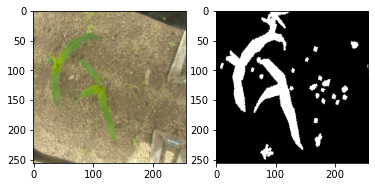

In [8]:
import time
import matplotlib.pyplot as plt

colors_dict = {}
colors_dict[1] = [255, 255, 255]
colors_dict[0] = [0, 0, 0]

iterator = iter(train_dataset)

fig, ax = plt.subplots(1, 2)
augmented_img, target = next(iterator)
augmented_img = augmented_img[0] #first element
augmented_img = augmented_img * 255 #denormalize

target = np.array(target[0, ..., 0])

target_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = colors_dict[0]
target_img[np.where(target == 1)] = colors_dict[1]

ax[0].imshow(np.uint8(augmented_img))
ax[1].imshow(np.uint8(target_img))

plt.show()

In [9]:
model = tf.keras.Sequential()

#Encoder
start_f = 8

for i in range(5):
    
    if i==0:
        input_shape = [256, 256, 3]
    else:
        input_shape = [None]
    
    model.add(tf.keras.layers.Conv2D(filters=start_f,
                                    kernel_size=(3, 3),
                                    strides=(1, 1),
                                    padding='same',
                                    input_shape=input_shape))
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    
    start_f *= 2
    
model.add(tf.keras.layers.Conv2D(filters=start_f,
                                    kernel_size=(3, 3),
                                    strides=(1, 1),
                                    padding='same',
                                    input_shape=input_shape))
model.add(tf.keras.layers.ReLU())


start_f = start_f // 2
#Decoder

for i in range(5):
    model.add(tf.keras.layers.UpSampling2D(2, interpolation='bilinear'))
    model.add(tf.keras.layers.Conv2D(filters=start_f,
                                    kernel_size=(3, 3),
                                    strides=(1, 1),
                                    padding='same',
                                    input_shape=input_shape))
    model.add(tf.keras.layers.ReLU())
    
    start_f = start_f // 2
    
#Classification layer 1 x 1 x C_i

model.add(tf.keras.layers.Conv2D(filters=1, #num_classes
                                kernel_size=(1, 1),
                                strides=(1, 1),
                                padding='same',
                                activation='sigmoid')) #softmax with many classes



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 8)       224       
_________________________________________________________________
re_lu (ReLU)                 (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4

In [11]:
loss = tf.keras.losses.BinaryCrossentropy()

lr = 1e-3

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

def IoU(y_true, y_pred):
    y_pred = tf.cast(y_pred >= 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred) #tot num of pixel in intersection
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    
    return (intersection + 1e-7)/ (union + 1e-7)

metrics = ['accuracy', IoU]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    

In [12]:
import os
from datetime import datetime


cwd = os.getcwd()

exps_dir = os.path.join(cwd, 'binary_classification_experiments')
if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

now = datetime.now().strftime('%b%d_%H-%M-%S')

model_name = 'CNN'

exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)
    
callbacks = []

# Model checkpoint
# ----------------
ckpt_dir = os.path.join(exp_dir, 'ckpts')
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp_{epoch:02d}.ckpt'), 
                                                   save_weights_only=True)  # False to save the model directly
callbacks.append(ckpt_callback)

# Visualize Learning on Tensorboard
# ---------------------------------
tb_dir = os.path.join(exp_dir, 'tb_logs')
if not os.path.exists(tb_dir):
    os.makedirs(tb_dir)
    
# By default shows losses and metrics for both training and validation
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir,
                                             profile_batch=0,
                                             histogram_freq=1)  # if 1 shows weights histograms
callbacks.append(tb_callback)

# Early Stopping
# --------------
early_stop = True
if early_stop:
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    callbacks.append(es_callback)

In [13]:
model.fit(x=train_dataset,
         epochs=100,
         steps_per_epoch=len(train_img_gen),
         validation_data=valid_dataset,
         validation_steps=len(valid_img_gen),
         callbacks=callbacks)

Epoch 1/100
6/6 [==============================] - 10s 2s/step - loss: 0.6575 - accuracy: 0.6601 - IoU: 0.0479 - val_loss: 0.5017 - val_accuracy: 0.8248 - val_IoU: 1.2442e-12
Epoch 2/100
6/6 [==============================] - 9s 1s/step - loss: 0.5369 - accuracy: 0.8018 - IoU: 7.7219e-13 - val_loss: 0.4781 - val_accuracy: 0.8248 - val_IoU: 1.2442e-12
Epoch 3/100
6/6 [==============================] - 9s 1s/step - loss: 0.5264 - accuracy: 0.7869 - IoU: 6.3357e-13 - val_loss: 0.4852 - val_accuracy: 0.8248 - val_IoU: 1.2442e-12
Epoch 4/100
6/6 [==============================] - 9s 1s/step - loss: 0.4909 - accuracy: 0.8015 - IoU: 9.0582e-13 - val_loss: 0.4358 - val_accuracy: 0.8248 - val_IoU: 1.2442e-12
Epoch 5/100
6/6 [==============================] - 9s 1s/step - loss: 0.4618 - accuracy: 0.7975 - IoU: 8.5067e-13 - val_loss: 0.4201 - val_accuracy: 0.8248 - val_IoU: 1.2442e-12
Epoch 6/100
6/6 [==============================] - 9s 1s/step - loss: 0.4485 - accuracy: 0.8065 - IoU: 7.9755e-13

In [14]:
import time
import matplotlib.pyplot as plt

from PIL import Image


iterator = iter(valid_dataset)

(1, 256, 256, 1)

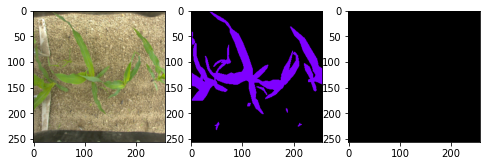

In [19]:
from matplotlib import cm

evenly_spaced_interval = np.linspace(0, 1, 20)

colors = [cm.rainbow(x) for x in evenly_spaced_interval]


fig, ax = plt.subplots(1, 3, figsize=(8, 8))
image, target = next(iterator)

image = image[0]
target = target[0, ..., 0]

out_sigmoid = model.predict(x=tf.expand_dims(image, 0))

# Get predicted class as the index corresponding to the maximum value in the vector probability
# predicted_class = tf.cast(out_sigmoid > score_th, tf.int32)
# predicted_class = predicted_class[0, ..., 0]
predicted_class = tf.argmax(out_sigmoid, -1)

out_sigmoid.shape

predicted_class = predicted_class[0, ...]

# Assign colors (just for visualization)
target_img = np.zeros([target.shape[0], target.shape[1], 3])
prediction_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 21):
    target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

prediction_img[np.where(predicted_class == 0)] = [0, 0, 0]
for i in range(1, 21):
    prediction_img[np.where(predicted_class == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(image*255))
ax[1].imshow(np.uint8(target_img))
ax[2].imshow(np.uint8(prediction_img))

fig.canvas.draw()
time.sleep(1)

In [16]:
np.uint8(prediction_img)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)